In [1]:
import numpy as np
import pandas as pd
import pandas_profiling
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from matplotlib import pyplot as plt
df8 = pd.read_csv('C:\\Users\\adity\\Documents\\Assignment 3\\dataset1_processed.csv')

# Converting Two Division for Country: Us & Non-Us

In [2]:
# https://www.kaggle.com/overload10/income-prediction-on-uci-adult-dataset
df8.loc[df8['native-country'] != 'United-States', 'native-country'] = 'Non-US'
df8.loc[df8['native-country'] == 'United-States', 'native-country'] = 'US'

In [3]:
df8.head()

age         workclass    fnlwgt  education  education-num  \
0  0.301370         State-gov  0.042616  Bachelors       0.203390   
1  0.452055  Self-emp-not-inc  0.046559  Bachelors       0.203390   
2  0.287671           Private  0.136593    HS-grad       0.135593   
3  0.493151           Private  0.149571       11th       0.101695   
4  0.150685           Private  0.220115  Bachelors       0.203390   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   hours-per-week native-country salary  
0        0.397959             US  <=50K  
1        0.122449             US  <=50K  
2        0.397959             US  <=50K  
3        0.397959             US  <=50K  
4        0.397959         Non-US  <=50K

# Removing the Other(Missing values) Values from Columns

In [4]:
# https://www.kaggle.com/overload10/income-prediction-on-uci-adult-dataset
indexNames_2 = df8[ df8['salary'] == 'Others' ].index
df8.drop(indexNames_2,inplace=True)
print(df8.shape)

(25616, 13)


In [5]:
indexNames_4 = df8[ df8['workclass'] == 'Others' ].index
df8.drop(indexNames_4,inplace=True)
print(df8.shape)

(23611, 13)


In [6]:
indexNames_3 = df8[ df8['occupation'] == 'Others' ].index
df8.drop(indexNames_3,inplace=True)
print(df8.shape)

(21814, 13)


In [7]:
df8.head()

age         workclass    fnlwgt  education  education-num  \
0  0.301370         State-gov  0.042616  Bachelors       0.203390   
1  0.452055  Self-emp-not-inc  0.046559  Bachelors       0.203390   
2  0.287671           Private  0.136593    HS-grad       0.135593   
3  0.493151           Private  0.149571       11th       0.101695   
4  0.150685           Private  0.220115  Bachelors       0.203390   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   hours-per-week native-country salary  
0        0.397959             US  <=50K  
1        0.122449             US  <=50K  
2        0.397959             US  <=50K  
3        0.397959             US  <=50K  
4        0.397959         Non-US  <=50K

# One-Hot Encoding

In [10]:
#https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.get_dummies.html
column_name= ["workclass","education","marital-status","occupation","relationship","race","sex","native-country"]

df5_1 = pd.get_dummies(df8,columns=column_name)        #converting categorical columns to binary columns
df5_1.head()

age    fnlwgt  education-num  hours-per-week salary  \
0  0.301370  0.042616       0.203390        0.397959  <=50K   
1  0.452055  0.046559       0.203390        0.122449  <=50K   
2  0.287671  0.136593       0.135593        0.397959  <=50K   
3  0.493151  0.149571       0.101695        0.397959  <=50K   
4  0.150685  0.220115       0.203390        0.397959  <=50K   

   workclass_Federal-gov  workclass_Local-gov  workclass_Private  \
0                      0                    0                  0   
1                      0                    0                  0   
2                      0                    0                  1   
3                      0                    0                  1   
4                      0                    0                  1   

   workclass_Self-emp-inc  workclass_Self-emp-not-inc        ...          \
0                       0                           0        ...           
1                       0                           1        ...           
2                       0                           0        ...           
3                       0                           0        ...           
4                       0                           0        ...           

   relationship_Wife  race_Amer-Indian-Eskimo  race_Asian-Pac-Islander  \
0                  0                        0                        0   
1                  0                        0                        0   
2                  0                        0                        0   
3                  0                        0                        0   
4                  1                        0                        0   

   race_Black  race_Other  race_White  sex_Female  sex_Male  \
0           0           0           1           0         1   
1           0           0           1           0         1   
2           0           0           1           0         1   
3           1           0           0           0         1   
4           1           0           0           1         0   

   native-country_Non-US  native-country_US  
0                      0                  1  
1                      0                  1  
2                      0                  1  
3                      0                  1  
4                      1                  0  

[5 rows x 64 columns]

In [12]:
df5_1.loc[df8['salary'] != '<=50K', 'salary'] = 0
df5_1.loc[df8['salary'] == '<=50K', 'salary'] = 1

# Dropping Salary(For Classification) and Education -Num

In [15]:
c1_1 = df5_1.drop(['salary','education-num'],axis=1)
c1_1.head()

age    fnlwgt  hours-per-week  workclass_Federal-gov  \
0  0.301370  0.042616        0.397959                      0   
1  0.452055  0.046559        0.122449                      0   
2  0.287671  0.136593        0.397959                      0   
3  0.493151  0.149571        0.397959                      0   
4  0.150685  0.220115        0.397959                      0   

   workclass_Local-gov  workclass_Private  workclass_Self-emp-inc  \
0                    0                  0                       0   
1                    0                  0                       0   
2                    0                  1                       0   
3                    0                  1                       0   
4                    0                  1                       0   

   workclass_Self-emp-not-inc  workclass_State-gov  workclass_Without-pay  \
0                           0                    1                      0   
1                           1                    0                      0   
2                           0                    0                      0   
3                           0                    0                      0   
4                           0                    0                      0   

         ...          relationship_Wife  race_Amer-Indian-Eskimo  \
0        ...                          0                        0   
1        ...                          0                        0   
2        ...                          0                        0   
3        ...                          0                        0   
4        ...                          1                        0   

   race_Asian-Pac-Islander  race_Black  race_Other  race_White  sex_Female  \
0                        0           0           0           1           0   
1                        0           0           0           1           0   
2                        0           0           0           1           0   
3                        0           1           0           0           0   
4                        0           1           0           0           1   

   sex_Male  native-country_Non-US  native-country_US  
0         1                      0                  1  
1         1                      0                  1  
2         1                      0                  1  
3         1                      0                  1  
4         0                      1                  0  

[5 rows x 62 columns]

# Create Train and Test Data

In [16]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

y_1=df5_1.salary

In [58]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
X_train, X_test, y_train, y_test = train_test_split(c1_1, y_1, test_size=0.3)
print (X_train.shape) 
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(15269, 62)
(15269,)
(6545, 62)
(6545,)


# SVM Classification

In [20]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [65]:
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
from sklearn import svm
clf = svm.SVC() 
clf.fit(X_train, y_train)
y_pred_svm = clf.predict(X_test)
y_pred_svm_1= clf.predict(X_train)
svm_test= f1_score(y_test, y_pred_svm, average='macro')
svm_test_1 = accuracy_score(y_test, y_pred_svm)
print("F1-Score :" ,"%.2f" %svm_test)
print("Accuracy-Score :" ,"%.2f" %svm_test_1)

C:\Users\adity\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


F1-Score : 0.73
Accuracy-Score : 0.82


In [67]:
svm_train= f1_score(y_train, y_pred_svm_1, average='macro')
svm_train_1 = accuracy_score(y_train, y_pred_svm_1)
print("F1-Score :" ,"%.2f" %svm_train)
print("Accuracy-Score :" ,"%.2f" %svm_train_1)

F1-Score : 0.74
Accuracy-Score : 0.83


# Random Forest Classifier

In [61]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier(n_jobs=-1)
model.fit(X_train,y_train)

C:\Users\adity\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [68]:
# Calcuation F1 and Accuracy for Test Data
y_pred_rfc = model.predict(X_test)
rfc_test= f1_score(y_test, y_pred_rfc, average='macro')
rfc_test_1 = accuracy_score(y_test, y_pred_rfc)
print("F1-Score :" ,"%.2f" %rfc_test)
print("Accuracy :" ,"%.2f" %rfc_test_1)

F1-Score : 0.74
Accuracy : 0.81


In [69]:
y_pred_rfc_train = model.predict(X_train)
rfc_train= f1_score(y_train, y_pred_rfc_train, average='macro')
rfc_train_1= accuracy_score(y_train, y_pred_rfc_train)
print("F1-Score :" ,"%.2f" %rfc_train)
print("Accuracy :" ,"%.2f" %rfc_train_1)

F1-Score : 0.99
Accuracy : 0.99


# Naive Bayes

In [64]:
# https://scikit-learn.org/stable/modules/naive_bayes.html
from sklearn.naive_bayes import GaussianNB
model_test_naive = GaussianNB()
model_test_naive.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [71]:
# https://scikit-learn.org/stable/modules/naive_bayes.html
y_pred_navie=model_test_naive.predict(X_test)
naive_test= f1_score(y_test, y_pred_navie, average='macro')
naive_test_1 = accuracy_score(y_test, y_pred_navie)
print("F1-Score :" ,"%.2f" %naive_test)
print("Accuracy :" ,"%.2f" %naive_test_1)

F1-Score : 0.58
Accuracy : 0.59


In [72]:
y_pred_navie_train=model_test_naive.predict(X_train)
naive_train= f1_score(y_train, y_pred_navie_train, average='macro')
naive_train_1 = accuracy_score(y_train, y_pred_navie_train)
print("F1-Score :" ,"%.2f" %naive_train)
print("Accuracy :" ,"%.2f" %naive_train_1)

F1-Score : 0.58
Accuracy : 0.58


# KNN Classifer(Unsupervised)

In [75]:
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 2)
# Fit the classifier to the data
knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)

In [76]:
knn_test= f1_score(y_test, y_pred_knn, average='macro')
knn_test_1 = accuracy_score(y_test, y_pred_knn)
print("F1-Score :" ,"%.2f" %knn_test)
print("Accuracy :" ,"%.2f" %knn_test_1)

F1-Score : 0.72
Accuracy : 0.76


In [78]:
y_pred_knn_train=knn.predict(X_train)
knn_train= f1_score(y_train, y_pred_knn_train, average='macro')
knn_train_1 = accuracy_score(y_train, y_pred_knn_train)
print("F1-Score :" ,"%.2f" %knn_train)
print("Accuracy :" ,"%.2f" %knn_train_1)

F1-Score : 0.86
Accuracy : 0.88


# Plot All the Classifier on Same Graph

In [100]:
y=['RFA','SVM','Naive']
test_F1=[]
test_Accuracy=[]
train_F1=[]
train_Accuracy=[]

In [101]:
# https://stackoverflow.com/questions/252703/what-is-the-difference-between-pythons-list-methods-append-and-extend
test_F1.extend([rfc_test,svm_test,naive_test])
test_Accuracy.extend([rfc_test_1,svm_test_1,naive_test_1])
train_F1.extend([rfc_train,svm_train,naive_train])
train_Accuracy.extend([rfc_train_1,svm_train_1,naive_train_1])

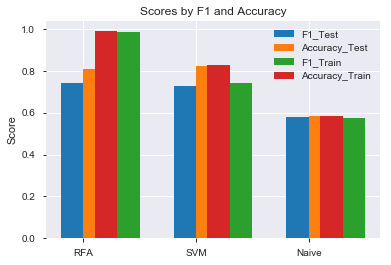

In [102]:
# https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x1 = np.arange(len(y))  # the label locations
width = 0.2 # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x1 - width/2,test_F1,width, label='F1_Test')
rects2 = ax.bar(x1 + width/2, test_Accuracy, width, label='Accuracy_Test')
rects3 = ax.bar(x1 + width*2, train_F1, width, label='F1_Train')
rects4 = ax.bar(x1 + width*1, train_Accuracy, width, label='Accuracy_Train')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_title('Scores by F1 and Accuracy')
ax.set_xticks(x1)
ax.set_xticklabels(y)
ax.legend()

plt.show()

# HyperTuning and Changing Parameter for Random Forest Classifer

In [103]:
categorical_variables=['workclass','education','marital-status','occupation','relationship','race','sex','native-country']

native-country    0.012111
sex               0.018534
race              0.020356
workclass         0.052821
relationship      0.069577
hours-per-week    0.104265
marital-status    0.109325
occupation        0.115623
education         0.123443
age               0.186703
fnlwgt            0.187241
dtype: float64


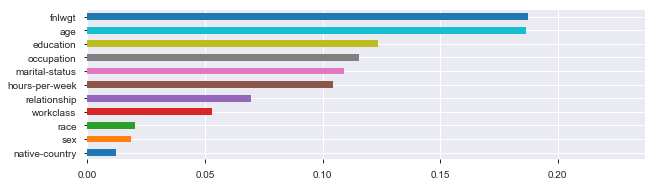

In [105]:
# //https://github.com/jinglebot/Titanic-Survival/blob/master/titanic_randomforest.ipynb
#//Information Gain was calculated using Gini 
def graph_feature_importances1(model, feature_names, autoscale=True, headroom=0.05, width=10, summarized_columns_1=None):
    if autoscale:
        x_scale_1 = model.feature_importances_.max() + headroom
    else:
        x_scale_1 = 1
        
    feature_dict_1=dict(zip(feature_names, model.feature_importances_))
    
    if summarized_columns_1:
        for col_name in summarized_columns_1:
            sum_value = sum(x for i, x in feature_dict_1.items() if col_name in i )
            keys_to_remove = [i for i in feature_dict_1.keys() if col_name in i ]
            for i in keys_to_remove:
                feature_dict_1.pop(i)
            feature_dict_1[col_name] = sum_value
    results = pd.Series(feature_dict_1, index=feature_dict_1.keys())
    results.sort_values(inplace=True)
    print(results)
    results.plot(kind='barh', figsize=(width, len(results)/4), xlim=(0, x_scale_1))
    
graph_feature_importances1(model, c1_1.columns, summarized_columns_1=categorical_variables)

In [106]:
c8=c1_1.drop(['native-country_US','native-country_Non-US'],axis=1)

In [107]:
X1_train, X1_test, y1_train, y1_test = train_test_split(c8, y_1, test_size=0.3)
print (X1_train.shape) 
print (y1_train.shape)
print (X1_test.shape)
print (y1_test.shape)

(15269, 60)
(15269,)
(6545, 60)
(6545,)


In [108]:
from sklearn.ensemble import RandomForestClassifier
model_1= RandomForestClassifier(n_jobs=-1,random_state=42)
model_1.fit(X1_train,y1_train)
# //Dropping Column Native Country Increased the accuracy for random forest(By removing missing values)
y_pred_rfc_1 = model_1.predict(X1_test)
rfc_test_hyper= f1_score(y1_test, y_pred_rfc_1, average='macro')
rfc_test_hyper_1 = accuracy_score(y1_test, y_pred_rfc_1)
print("F1-Score :" ,"%.2f" %rfc_test_hyper)
print("Accuracy-Score :" ,"%.2f" %rfc_test_hyper_1)

C:\Users\adity\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


F1-Score : 0.75
Accuracy-Score : 0.81


# Selecting and Tunning Different Paramters

# 1) N-Estimator

30 trees
F1-Score:  0.7514401184320814
 
50 trees
F1-Score:  0.7542079985622303
 
100 trees
F1-Score:  0.7552318886054157
 
200 trees
F1-Score:  0.7587566072194434
 
500 trees
F1-Score:  0.7591224738815394
 
1000 trees
F1-Score:  0.7580020912915864
 
1500 trees
F1-Score:  0.7589074653207473
 
2000 trees
F1-Score:  0.7584259054924767
 
2500 trees
F1-Score:  0.758110355987055
 
3000 trees
F1-Score:  0.758110355987055
 


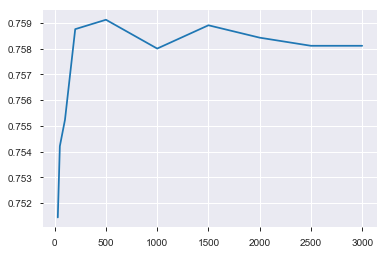

In [109]:
# //https://github.com/jinglebot/Titanic-Survival/blob/master/titanic_randomforest.ipynb
results5 = []
n_estimator_options = [30, 50, 100, 200, 500, 1000,1500,2000,2500,3000]

for trees in n_estimator_options:
    model_test_1 = RandomForestClassifier(n_estimators=trees,n_jobs=-1,random_state=42)
    #model.fit(X, y)
    model_test_1.fit(X1_train, y1_train)
    print(trees, 'trees')
    y_pred_rfc_5_1 = model_test_1.predict(X1_test)
    rfc_reg_8_11= f1_score(y1_test, y_pred_rfc_5_1, average='macro')
    print('F1-Score: ', rfc_reg_8_11)
    results5.append(rfc_reg_8_11)
    print (" ")
    
pd.Series(results5, n_estimator_options).plot()

# Min_Samples_Leaf

C:\Users\adity\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


1 min samples
F1-Score:  0.75
 


C:\Users\adity\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


2 min samples
F1-Score:  0.76
 


C:\Users\adity\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


3 min samples
F1-Score:  0.76
 


C:\Users\adity\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


4 min samples
F1-Score:  0.77
 


C:\Users\adity\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


5 min samples
F1-Score:  0.77
 


C:\Users\adity\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


6 min samples
F1-Score:  0.77
 


C:\Users\adity\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


7 min samples
F1-Score:  0.75
 


C:\Users\adity\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


8 min samples
F1-Score:  0.76
 


C:\Users\adity\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


9 min samples
F1-Score:  0.76
 


C:\Users\adity\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


10 min samples
F1-Score:  0.75
 


C:\Users\adity\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


11 min samples
F1-Score:  0.75
 


C:\Users\adity\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


12 min samples
F1-Score:  0.75
 


C:\Users\adity\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


13 min samples
F1-Score:  0.75
 


C:\Users\adity\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


14 min samples
F1-Score:  0.76
 


C:\Users\adity\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


15 min samples
F1-Score:  0.75
 


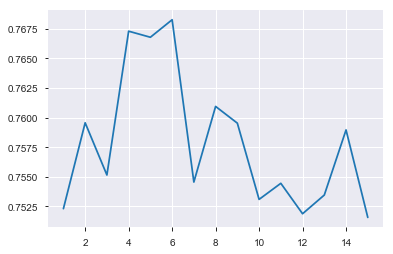

In [111]:
# //https://github.com/jinglebot/Titanic-Survival/blob/master/titanic_randomforest.ipynb
results1 = []
min_samples_leaf_options = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for min_samples in min_samples_leaf_options:
    model_test_2 = RandomForestClassifier(min_samples_leaf=min_samples,n_jobs=-1,random_state=42)
    #model.fit(X, y)
    model_test_2.fit(X1_train, y1_train)
    print(min_samples, "min samples")
    y_pred_rfc_5 = model_test_2.predict(X1_test)
    rfc_reg_8= f1_score(y1_test, y_pred_rfc_5, average='macro')
    print('F1-Score: ', "%.2f" %rfc_reg_8)
    results1.append(rfc_reg_8)
    print (" ")
    
pd.Series(results1, min_samples_leaf_options).plot()


# Max_Depths

C:\Users\adity\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


1.0 max depths
F1-Score:  0.4280845858091576
 


C:\Users\adity\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\adity\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


2.0 max depths
F1-Score:  0.4280845858091576
 


C:\Users\adity\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\adity\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


3.0 max depths
F1-Score:  0.46660260486283417
 


C:\Users\adity\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


4.0 max depths
F1-Score:  0.6755443935036793
 


C:\Users\adity\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


5.0 max depths
F1-Score:  0.7026927209239859
 


C:\Users\adity\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


6.0 max depths
F1-Score:  0.7230189319158646
 


C:\Users\adity\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


7.0 max depths
F1-Score:  0.7168328811322138
 


C:\Users\adity\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


8.0 max depths
F1-Score:  0.7437574292139314
 


C:\Users\adity\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


9.0 max depths
F1-Score:  0.7443792304149381
 


C:\Users\adity\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


10.0 max depths
F1-Score:  0.7514212568607364
 


C:\Users\adity\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


11.0 max depths
F1-Score:  0.7586074393527298
 


C:\Users\adity\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


12.0 max depths
F1-Score:  0.755241296914127
 


C:\Users\adity\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


13.0 max depths
F1-Score:  0.7515352725873554
 


C:\Users\adity\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


14.0 max depths
F1-Score:  0.7507538706760186
 


C:\Users\adity\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


15.0 max depths
F1-Score:  0.7537154329464117
 


C:\Users\adity\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


16.0 max depths
F1-Score:  0.7562110726643598
 


C:\Users\adity\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


17.0 max depths
F1-Score:  0.7535931169071635
 


C:\Users\adity\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


18.0 max depths
F1-Score:  0.7575610900373606
 


C:\Users\adity\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


19.0 max depths
F1-Score:  0.7530193884144734
 


C:\Users\adity\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


20.0 max depths
F1-Score:  0.7608255128517909
 


C:\Users\adity\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


21.0 max depths
F1-Score:  0.7606934102356671
 


C:\Users\adity\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


22.0 max depths
F1-Score:  0.7529900666815084
 


C:\Users\adity\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


23.0 max depths
F1-Score:  0.7643990072522084
 


C:\Users\adity\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


24.0 max depths
F1-Score:  0.7495256756697752
 


C:\Users\adity\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


25.0 max depths
F1-Score:  0.7460948228196933
 


C:\Users\adity\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


26.0 max depths
F1-Score:  0.7480131018659573
 


C:\Users\adity\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


27.0 max depths
F1-Score:  0.7504176598896661
 


C:\Users\adity\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


28.0 max depths
F1-Score:  0.7467188352134102
 


C:\Users\adity\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


29.0 max depths
F1-Score:  0.7539323143476164
 


C:\Users\adity\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


30.0 max depths
F1-Score:  0.7427064108940005
 


C:\Users\adity\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


31.0 max depths
F1-Score:  0.7389122242260755
 


C:\Users\adity\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


32.0 max depths
F1-Score:  0.7478530542719415
 


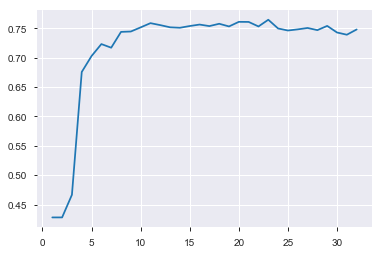

In [112]:
# //https://github.com/jinglebot/Titanic-Survival/blob/master/titanic_randomforest.ipynb
results9=[]
max_depths = np.linspace(1, 32, 32, endpoint=True)
for max_depths_1 in max_depths:
    model_test_3 = RandomForestClassifier(max_depth=max_depths_1,n_jobs=-1,random_state=42)
    #model.fit(X, y)
    model_test_3.fit(X1_train, y1_train)
    print(max_depths_1, "max depths")
    y_pred_rfc_61 = model_test_3.predict(X1_test)
    rfc_reg_8_111= f1_score(y1_test, y_pred_rfc_61, average='macro')
    print('F1-Score: ', rfc_reg_8_111)
    results9.append(rfc_reg_8_111)
    print (" ")
    
pd.Series(results9, max_depths).plot()

# Max_Features Option

C:\Users\adity\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


auto options
F1-Score:  0.752313270525191
 


C:\Users\adity\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


None options
F1-Score:  0.7470671491163293
 


C:\Users\adity\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


sqrt options
F1-Score:  0.752313270525191
 


C:\Users\adity\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


log2 options
F1-Score:  0.7501146010451116
 


C:\Users\adity\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9 options
F1-Score:  0.7478045096908426
 


C:\Users\adity\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.2 options
F1-Score:  0.7472158644620015
 


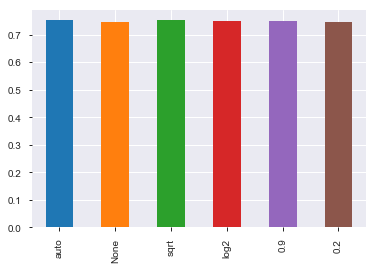

In [114]:
# //https://github.com/jinglebot/Titanic-Survival/blob/master/titanic_randomforest.ipynb
results_5 = []
max_features_options = ["auto", None, "sqrt", "log2", 0.9, 0.2]

for max_features in max_features_options:
    model_test_4 = RandomForestClassifier(max_features=max_features, n_jobs=-1, random_state=42)
    #model.fit(X, y)
    model_test_4.fit(X1_train, y1_train)
    print(max_features, "options")
    y_pred_rfc_7_1 = model_test_4.predict(X1_test)
    rfc_reg_8_2_11= f1_score(y1_test, y_pred_rfc_7_1, average='macro')
    print('F1-Score: ', rfc_reg_8_2_11)
    results_5.append(rfc_reg_8_2_11)
    print (" ")

pd.Series(results_5, max_features_options).plot(kind='bar', xlim=(.85, .88))


# Final Model with the correct Parameter and Tunning

In [132]:
model_final= RandomForestClassifier(min_samples_leaf=6,n_jobs=-1,random_state=42)
model_final.fit(X1_train, y1_train)
y_pred_rfc_5_1 = model_final.predict(X1_test)
rfc_reg_8_1= f1_score(y1_test, y_pred_rfc_5_1, average='macro')
rfc_test_2= accuracy_score(y1_test, y_pred_rfc_5_1)
print('F1-Score: ', "%.2f" %rfc_reg_8_1)
print('Accuracy-Score: ', "%.2f" %rfc_test_2)


C:\Users\adity\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


F1-Score:  0.77
Accuracy-Score:  0.84


# Overfitting Reduced

In [129]:
model_final_1= RandomForestClassifier(min_samples_leaf=6,n_jobs=-1,random_state=42)
model_final_1.fit(X1_train, y1_train)
y_pred_rfc_5_2 = model_final.predict(X1_train)
rfc_reg_8_2= f1_score(y1_train, y_pred_rfc_5_2, average='macro')
rfc_train_2= accuracy_score(y1_train, y_pred_rfc_5_2)

print('F1-Score: ', "%.2f" %rfc_reg_8_2)
print('Accuracy Score: ', "%.2f" %rfc_train_2)


C:\Users\adity\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


F1-Score:  0.78
Accuracy Score:  0.85


# Predicting the Salary

In [116]:
df_test= pd.read_csv('C:\\Users\\adity\\Documents\\Assignment 3\\dataset1_test.csv')

In [117]:
df_test=df_test.drop(['native-country','capital-gain','capital-loss','education-num'],axis=1)
df_test.head()

age workclass  fnlwgt education marital-status         occupation  \
0   17   Private  269430      10th  Never-married  Machine-op-inspct   
1   17   Private   40299      11th  Never-married              Sales   
2   17   Private  190941      10th  Never-married              Sales   
3   17   Private   61838      11th  Never-married    Farming-fishing   
4   17   Private   28544      11th  Never-married              Sales   

    relationship   race     sex  hours-per-week  
0  Not-in-family  White    Male              40  
1      Own-child  White  Female              25  
2      Own-child  White  Female              20  
3      Own-child  White    Male              40  
4  Not-in-family  White  Female              20

In [118]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

ff7_num = df_test.select_dtypes(include=[np.number])
fffd= normalize(ff7_num)
df_test[fffd.columns] = fffd
df_test.head()

age workclass    fnlwgt education marital-status         occupation  \
0  0.0   Private  0.173293      10th  Never-married  Machine-op-inspct   
1  0.0   Private  0.018151      11th  Never-married              Sales   
2  0.0   Private  0.120149      10th  Never-married              Sales   
3  0.0   Private  0.032735      11th  Never-married    Farming-fishing   
4  0.0   Private  0.010192      11th  Never-married              Sales   

    relationship   race     sex  hours-per-week  
0  Not-in-family  White    Male        0.397959  
1      Own-child  White  Female        0.244898  
2      Own-child  White  Female        0.193878  
3      Own-child  White    Male        0.397959  
4  Not-in-family  White  Female        0.193878

In [119]:
column_name= ["workclass","education","marital-status","occupation","relationship","race","sex"]

df_test_2 = pd.get_dummies(df_test,columns=column_name)        #converting categorical columns to binary columns
df_test_2.head()

age    fnlwgt  hours-per-week  workclass_Federal-gov  workclass_Local-gov  \
0  0.0  0.173293        0.397959                      0                    0   
1  0.0  0.018151        0.244898                      0                    0   
2  0.0  0.120149        0.193878                      0                    0   
3  0.0  0.032735        0.397959                      0                    0   
4  0.0  0.010192        0.193878                      0                    0   

   workclass_Private  workclass_Self-emp-inc  workclass_Self-emp-not-inc  \
0                  1                       0                           0   
1                  1                       0                           0   
2                  1                       0                           0   
3                  1                       0                           0   
4                  1                       0                           0   

   workclass_State-gov  workclass_Without-pay    ...     \
0                    0                      0    ...      
1                    0                      0    ...      
2                    0                      0    ...      
3                    0                      0    ...      
4                    0                      0    ...      

   relationship_Own-child  relationship_Unmarried  relationship_Wife  \
0                       0                       0                  0   
1                       1                       0                  0   
2                       1                       0                  0   
3                       1                       0                  0   
4                       0                       0                  0   

   race_Amer-Indian-Eskimo  race_Asian-Pac-Islander  race_Black  race_Other  \
0                        0                        0           0           0   
1                        0                        0           0           0   
2                        0                        0           0           0   
3                        0                        0           0           0   
4                        0                        0           0           0   

   race_White  sex_Female  sex_Male  
0           1           0         1  
1           1           1         0  
2           1           1         0  
3           1           0         1  
4           1           1         0  

[5 rows x 60 columns]

In [120]:
y_test_prediction = model_final.predict(df_test_2)

In [121]:
newlist = []
for item in y_test_prediction:
    if item == 1:
        item ="<=50k"
    elif item == 0:
        item=">50K"
    newlist.append(item)
y_test_prediction = newlist

In [123]:
dataset_final = pd.DataFrame(newlist)

In [125]:
dataset_final.to_csv('B00810156_prediction.csv',index=False)